In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]
df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
X_train

array([[-1.   , -0.064, -0.08 , ...,  0.   ,  0.   ,  0.   ],
       [-1.   , -0.132, -0.136, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , -0.163, -0.209, ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 1.   , -0.131, -0.022, ...,  0.333,  0.   ,  0.   ],
       [ 1.   , -0.112, -0.085, ...,  0.522,  0.761,  0.935],
       [ 1.   , -0.083, -0.048, ...,  0.534,  0.46 ,  0.548]])

In [5]:
X_train.shape

(34481, 11)

In [6]:
X_test.shape

(17240, 11)

In [7]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [8]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.9851 - acc: 0.5357 - val_loss: 0.6968 - val_acc: 0.5328
Epoch 2/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6905 - acc: 0.5464 - val_loss: 0.6939 - val_acc: 0.5289
Epoch 3/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6904 - acc: 0.5468 - val_loss: 0.6924 - val_acc: 0.5339
Epoch 4/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6904 - acc: 0.5459 - val_loss: 0.6922 - val_acc: 0.5330
Epoch 5/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6899 - acc: 0.5467 - val_loss: 0.6940 - val_acc: 0.5292
Epoch 6/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6900 - acc: 0.5468 - val_loss: 0.6906 - val_acc: 0.5346
Epoch 7/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6904 - acc: 0.5464 - val_loss: 0.6923 - 

27584/27584 [==============================] - 0s 8us/step - loss: 0.6876 - acc: 0.5509 - val_loss: 0.6914 - val_acc: 0.5357
Epoch 60/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6875 - acc: 0.5512 - val_loss: 0.6908 - val_acc: 0.5357
Epoch 61/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6876 - acc: 0.5512 - val_loss: 0.6906 - val_acc: 0.5360
Epoch 62/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6875 - acc: 0.5510 - val_loss: 0.6905 - val_acc: 0.5376
Epoch 63/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6874 - acc: 0.5512 - val_loss: 0.6907 - val_acc: 0.5368
Epoch 64/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6875 - acc: 0.5516 - val_loss: 0.6908 - val_acc: 0.5373
Epoch 65/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6874 - acc: 0.5507 - val_loss: 0.6908 - val_acc: 0.5365
Epoch 66/1000
27584/27584 [==============

Epoch 118/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.5516 - val_loss: 0.6909 - val_acc: 0.5360
Epoch 119/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.5520 - val_loss: 0.6912 - val_acc: 0.5340
Epoch 120/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.5517 - val_loss: 0.6912 - val_acc: 0.5344
Epoch 121/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.5519 - val_loss: 0.6911 - val_acc: 0.5347
Epoch 122/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6872 - acc: 0.5518 - val_loss: 0.6911 - val_acc: 0.5350
Epoch 123/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6871 - acc: 0.5521 - val_loss: 0.6909 - val_acc: 0.5349
Epoch 124/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6871 - acc: 0.5524 - val_loss: 0.6915 - val_acc: 0.5349
Epoch 125/1000
27584

27584/27584 [==============================] - 0s 8us/step - loss: 0.6866 - acc: 0.5549 - val_loss: 0.6917 - val_acc: 0.5359
Epoch 177/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6866 - acc: 0.5547 - val_loss: 0.6909 - val_acc: 0.5360
Epoch 178/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6865 - acc: 0.5552 - val_loss: 0.6912 - val_acc: 0.5349
Epoch 179/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6866 - acc: 0.5552 - val_loss: 0.6911 - val_acc: 0.5362
Epoch 180/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6865 - acc: 0.5552 - val_loss: 0.6912 - val_acc: 0.5357
Epoch 181/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6865 - acc: 0.5549 - val_loss: 0.6910 - val_acc: 0.5355
Epoch 182/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6866 - acc: 0.5547 - val_loss: 0.6909 - val_acc: 0.5352
Epoch 183/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6861 - acc: 0.5558 - val_loss: 0.6912 - val_acc: 0.5353
Epoch 235/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6862 - acc: 0.5572 - val_loss: 0.6906 - val_acc: 0.5384
Epoch 236/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6861 - acc: 0.5569 - val_loss: 0.6908 - val_acc: 0.5362
Epoch 237/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6863 - acc: 0.5564 - val_loss: 0.6913 - val_acc: 0.5347
Epoch 238/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6862 - acc: 0.5566 - val_loss: 0.6909 - val_acc: 0.5359
Epoch 239/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6862 - acc: 0.5569 - val_loss: 0.6906 - val_acc: 0.5379
Epoch 240/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6861 - acc: 0.5568 - val_loss: 0.6906 - val_acc: 0.5385
Epoch 241/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6852 - acc: 0.5589 - val_loss: 0.6902 - val_acc: 0.5385
Epoch 293/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6853 - acc: 0.5591 - val_loss: 0.6898 - val_acc: 0.5450
Epoch 294/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6857 - acc: 0.5589 - val_loss: 0.6903 - val_acc: 0.5370
Epoch 295/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6853 - acc: 0.5587 - val_loss: 0.6894 - val_acc: 0.5423
Epoch 296/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6859 - acc: 0.5570 - val_loss: 0.6904 - val_acc: 0.5389
Epoch 297/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6857 - acc: 0.5580 - val_loss: 0.6901 - val_acc: 0.5398
Epoch 298/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6853 - acc: 0.5589 - val_loss: 0.6890 - val_acc: 0.5443
Epoch 299/1000
27584/27584 [====

27584/27584 [==============================] - 0s 10us/step - loss: 0.6858 - acc: 0.5569 - val_loss: 0.6908 - val_acc: 0.5365
Epoch 351/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6858 - acc: 0.5571 - val_loss: 0.6913 - val_acc: 0.5352
Epoch 352/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6858 - acc: 0.5574 - val_loss: 0.6905 - val_acc: 0.5384
Epoch 353/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6860 - acc: 0.5566 - val_loss: 0.6914 - val_acc: 0.5343
Epoch 354/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6859 - acc: 0.5562 - val_loss: 0.6909 - val_acc: 0.5359
Epoch 355/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6859 - acc: 0.5564 - val_loss: 0.6908 - val_acc: 0.5357
Epoch 356/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6857 - acc: 0.5571 - val_loss: 0.6904 - val_acc: 0.5391
Epoch 357/1000
27584/27584 [====

27584/27584 [==============================] - 0s 8us/step - loss: 0.6845 - acc: 0.5603 - val_loss: 0.6895 - val_acc: 0.5428
Epoch 409/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6844 - acc: 0.5610 - val_loss: 0.6890 - val_acc: 0.5436
Epoch 410/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6839 - acc: 0.5628 - val_loss: 0.6897 - val_acc: 0.5444
Epoch 411/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6851 - acc: 0.5616 - val_loss: 0.6895 - val_acc: 0.5417
Epoch 412/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6859 - acc: 0.5579 - val_loss: 0.6908 - val_acc: 0.5370
Epoch 413/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6854 - acc: 0.5573 - val_loss: 0.6908 - val_acc: 0.5366
Epoch 414/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6853 - acc: 0.5576 - val_loss: 0.6901 - val_acc: 0.5388
Epoch 415/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6845 - acc: 0.5588 - val_loss: 0.6899 - val_acc: 0.5386
Epoch 467/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6850 - acc: 0.5583 - val_loss: 0.6896 - val_acc: 0.5399
Epoch 468/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6849 - acc: 0.5597 - val_loss: 0.6907 - val_acc: 0.5397
Epoch 469/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6843 - acc: 0.5598 - val_loss: 0.6954 - val_acc: 0.5408
Epoch 470/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6850 - acc: 0.5588 - val_loss: 0.6907 - val_acc: 0.5385
Epoch 471/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6856 - acc: 0.5569 - val_loss: 0.6903 - val_acc: 0.5378
Epoch 472/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6852 - acc: 0.5576 - val_loss: 0.6904 - val_acc: 0.5369
Epoch 473/1000
27584/27584 [===

Epoch 524/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6843 - acc: 0.5598 - val_loss: 0.6894 - val_acc: 0.5386
Epoch 525/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6835 - acc: 0.5605 - val_loss: 0.6935 - val_acc: 0.5401
Epoch 526/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6837 - acc: 0.5605 - val_loss: 0.6890 - val_acc: 0.5430
Epoch 527/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5611 - val_loss: 0.6921 - val_acc: 0.5465
Epoch 528/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5616 - val_loss: 0.6903 - val_acc: 0.5449
Epoch 529/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5618 - val_loss: 0.6879 - val_acc: 0.5452
Epoch 530/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6837 - acc: 0.5617 - val_loss: 0.6887 - val_acc: 0.5437
Epoch 531/1000
2758

27584/27584 [==============================] - 0s 11us/step - loss: 0.6821 - acc: 0.5623 - val_loss: 0.6879 - val_acc: 0.5446
Epoch 583/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6827 - acc: 0.5625 - val_loss: 0.6892 - val_acc: 0.5401
Epoch 584/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6832 - acc: 0.5600 - val_loss: 0.6879 - val_acc: 0.5433
Epoch 585/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6819 - acc: 0.5623 - val_loss: 0.6886 - val_acc: 0.5421
Epoch 586/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6824 - acc: 0.5633 - val_loss: 0.6877 - val_acc: 0.5455
Epoch 587/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6820 - acc: 0.5641 - val_loss: 0.6869 - val_acc: 0.5494
Epoch 588/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6816 - acc: 0.5648 - val_loss: 0.6871 - val_acc: 0.5485
Epoch 589/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6823 - acc: 0.5600 - val_loss: 0.6888 - val_acc: 0.5404
Epoch 641/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6817 - acc: 0.5616 - val_loss: 0.6913 - val_acc: 0.5430
Epoch 642/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6824 - acc: 0.5604 - val_loss: 0.7177 - val_acc: 0.5401
Epoch 643/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6827 - acc: 0.5592 - val_loss: 0.6893 - val_acc: 0.5412
Epoch 644/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6819 - acc: 0.5609 - val_loss: 0.6893 - val_acc: 0.5398
Epoch 645/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6827 - acc: 0.5594 - val_loss: 0.6889 - val_acc: 0.5402
Epoch 646/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6819 - acc: 0.5618 - val_loss: 0.6951 - val_acc: 0.5398
Epoch 647/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6809 - acc: 0.5626 - val_loss: 0.6872 - val_acc: 0.5478
Epoch 699/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6807 - acc: 0.5650 - val_loss: 0.6874 - val_acc: 0.5523
Epoch 700/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6805 - acc: 0.5634 - val_loss: 0.6874 - val_acc: 0.5476
Epoch 701/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6807 - acc: 0.5653 - val_loss: 0.6874 - val_acc: 0.5468
Epoch 702/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6813 - acc: 0.5641 - val_loss: 0.6862 - val_acc: 0.5511
Epoch 703/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6838 - acc: 0.5642 - val_loss: 0.6866 - val_acc: 0.5486
Epoch 704/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6809 - acc: 0.5652 - val_loss: 0.6877 - val_acc: 0.5486
Epoch 705/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6818 - acc: 0.5630 - val_loss: 0.6939 - val_acc: 0.5443
Epoch 757/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6831 - acc: 0.5622 - val_loss: 0.7030 - val_acc: 0.5447
Epoch 758/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6821 - acc: 0.5616 - val_loss: 0.6895 - val_acc: 0.5446
Epoch 759/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6826 - acc: 0.5639 - val_loss: 0.6911 - val_acc: 0.5481
Epoch 760/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6825 - acc: 0.5642 - val_loss: 0.6892 - val_acc: 0.5441
Epoch 761/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6823 - acc: 0.5625 - val_loss: 0.7008 - val_acc: 0.5446
Epoch 762/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6842 - acc: 0.5614 - val_loss: 0.6918 - val_acc: 0.5476
Epoch 763/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 4.9023 - acc: 0.5361 - val_loss: 4.7952 - val_acc: 0.4938
Epoch 815/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.6022 - acc: 0.5268 - val_loss: 4.8592 - val_acc: 0.5125
Epoch 816/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.7293 - acc: 0.5235 - val_loss: 5.1152 - val_acc: 0.5096
Epoch 817/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.7757 - acc: 0.5181 - val_loss: 4.8735 - val_acc: 0.5101
Epoch 818/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.7934 - acc: 0.5075 - val_loss: 4.9702 - val_acc: 0.5105
Epoch 819/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.8301 - acc: 0.5141 - val_loss: 5.1041 - val_acc: 0.4711
Epoch 820/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.9603 - acc: 0.4967 - val_loss: 4.9960 - val_acc: 0.5349
Epoch 821/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 3.3189 - acc: 0.5413 - val_loss: 3.5302 - val_acc: 0.5382
Epoch 873/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.1393 - acc: 0.5395 - val_loss: 3.7376 - val_acc: 0.5366
Epoch 874/1000
27584/27584 [==============================] - 0s 12us/step - loss: 3.4646 - acc: 0.5243 - val_loss: 3.7742 - val_acc: 0.5363
Epoch 875/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.4862 - acc: 0.5370 - val_loss: 3.2411 - val_acc: 0.5376
Epoch 876/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.2727 - acc: 0.5461 - val_loss: 3.5406 - val_acc: 0.5385
Epoch 877/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.2669 - acc: 0.5442 - val_loss: 3.8383 - val_acc: 0.5360
Epoch 878/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.4424 - acc: 0.5498 - val_loss: 3.5687 - val_acc: 0.5385
Epoch 879/1000
27584/27584 [

27584/27584 [==============================] - 0s 8us/step - loss: 2.4571 - acc: 0.5410 - val_loss: 2.7717 - val_acc: 0.5281
Epoch 931/1000
27584/27584 [==============================] - 0s 9us/step - loss: 2.1975 - acc: 0.5308 - val_loss: 2.3442 - val_acc: 0.5285
Epoch 932/1000
27584/27584 [==============================] - 0s 11us/step - loss: 2.0750 - acc: 0.5292 - val_loss: 2.1384 - val_acc: 0.5301
Epoch 933/1000
27584/27584 [==============================] - 0s 10us/step - loss: 1.9103 - acc: 0.5337 - val_loss: 2.4673 - val_acc: 0.5091
Epoch 934/1000
27584/27584 [==============================] - 0s 9us/step - loss: 1.6798 - acc: 0.5327 - val_loss: 1.5032 - val_acc: 0.5099
Epoch 935/1000
27584/27584 [==============================] - 0s 8us/step - loss: 1.5658 - acc: 0.5366 - val_loss: 1.9750 - val_acc: 0.5257
Epoch 936/1000
27584/27584 [==============================] - 0s 9us/step - loss: 1.4109 - acc: 0.5342 - val_loss: 1.9402 - val_acc: 0.5288
Epoch 937/1000
27584/27584 [=====

27584/27584 [==============================] - 0s 11us/step - loss: 3.8139 - acc: 0.5263 - val_loss: 3.7595 - val_acc: 0.5002
Epoch 989/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.2232 - acc: 0.5313 - val_loss: 4.7961 - val_acc: 0.5331
Epoch 990/1000
27584/27584 [==============================] - 0s 11us/step - loss: 3.6195 - acc: 0.5330 - val_loss: 4.9313 - val_acc: 0.5331
Epoch 991/1000
27584/27584 [==============================] - 0s 10us/step - loss: 4.3357 - acc: 0.5296 - val_loss: 4.9893 - val_acc: 0.5331
Epoch 992/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.2299 - acc: 0.5344 - val_loss: 5.1597 - val_acc: 0.5330
Epoch 993/1000
27584/27584 [==============================] - 0s 12us/step - loss: 4.0148 - acc: 0.5267 - val_loss: 4.7386 - val_acc: 0.5331
Epoch 994/1000
27584/27584 [==============================] - 0s 11us/step - loss: 4.0947 - acc: 0.5351 - val_loss: 4.6319 - val_acc: 0.5331
Epoch 995/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC528089E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BC529CA128>]], dtype=object)

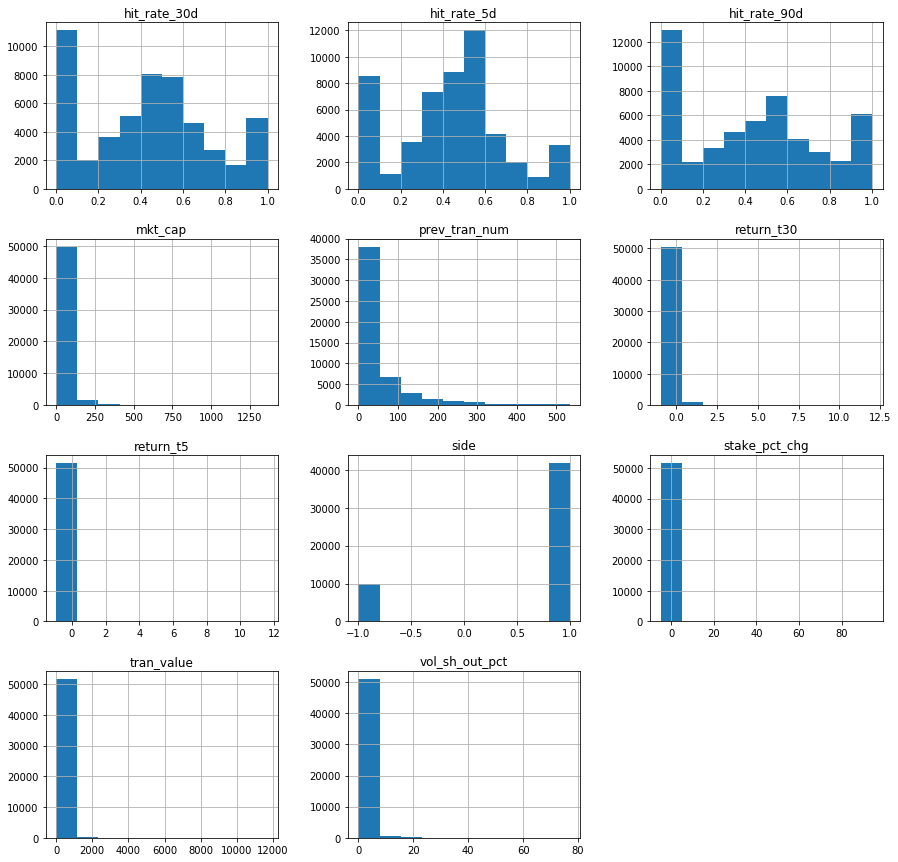

In [10]:
df[col_list].hist(figsize = [15,15])

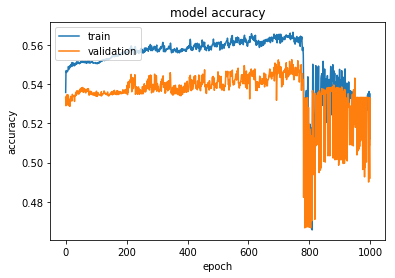

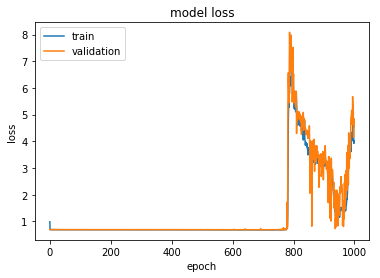

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 23us/step
[Train] acc: 50.15%
17240/17240 [==============================] - 1s 29us/step
[Test] acc: 47.99%
